# <center> <strong>Student Performance Analysis Data Science Portfolio<strong></center>
## <center> <strong>By Akintoye Adesomoju</strong></center>
### <center> <img src='https://media.istockphoto.com/id/1307457391/photo/happy-black-student-raising-arm-to-answer-question-while-attending-class-with-her-university.jpg?s=612x612&w=0&k=20&c=iZaZFyC-WqlqSQc4elqUNPTxLvWPe8P5Tb_YdZnrI9Q=' alt='Student Image'> </center>




## <strong>Purpose of this Project</strong>
#### This project showcases a students data file which includes information about students in a highschool located in Atlanta, GA and their respective final scores in a standardized exam.<br><br> We will determine to see if there is a relationship between any of the features in the dataset and the students final grades.


#### <strong>Pre-loading needed libraries</strong>

In [ ]:
!pip install scikit-learn==1.2
!pip install dabl==0.2.4

In [1]:
# Import the libraries we will be using
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import plotly.express as px
import dabl
%matplotlib inline

#### <strong>Exploratory Data Analysis</strong>

In [2]:
# Inserting the data into a variable - data
data = pd.read_csv('StudentsPerformance.csv')

In [3]:
# Early EDA to understand the data a bit more
data.sample(10)
print(f' The data variable has {data.shape[0]} rows and {data.shape[1]} columns.')
data.dtypes

 The data variable has 1000 rows and 8 columns.


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [4]:
# Checking for the unique values for every column so we can account dummy variables if needed
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [5]:
# Checking for missing variables, which we would replace with freq
column_amt = data.shape[0]
percentage = data.isnull().sum()/column_amt
print(percentage)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


Target looks like regression


[<AxesSubplot: title={'center': 'Target distribution'}, xlabel='math score', ylabel='frequency'>,
 array([[<AxesSubplot: title={'center': 'F=8.04E-01'}, xlabel='reading score', ylabel='math score'>,
         <AxesSubplot: title={'center': 'F=7.78E-01'}, xlabel='writing score'>]],
       dtype=object),
 array([[<AxesSubplot: title={'center': 'F=6.42E-02'}, xlabel='math score', ylabel='gender'>,
         <AxesSubplot: title={'center': 'F=3.79E-02'}, xlabel='math score', ylabel='race/ethnicity'>,
         <AxesSubplot: title={'center': 'F=9.89E-03'}, xlabel='math score', ylabel='parental level of education'>,
         <AxesSubplot: title={'center': 'F=0.00E+00'}, xlabel='math score', ylabel='lunch'>,
         <AxesSubplot: title={'center': 'F=0.00E+00'}, xlabel='math score', ylabel='test preparation course'>]],
       dtype=object)]

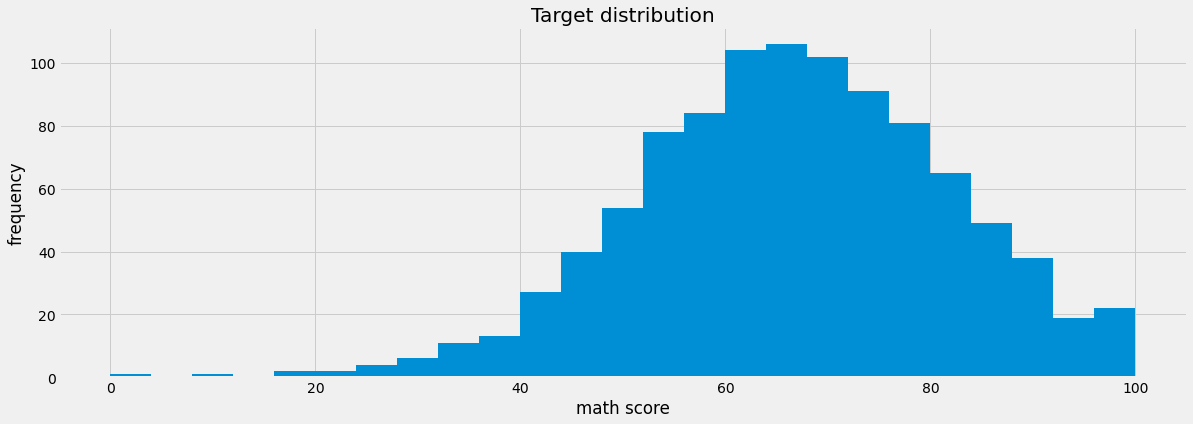

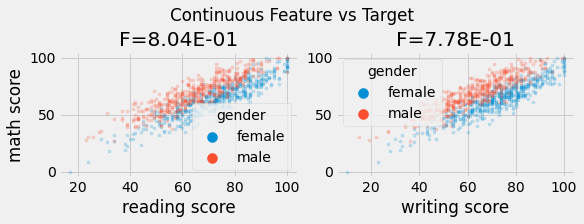

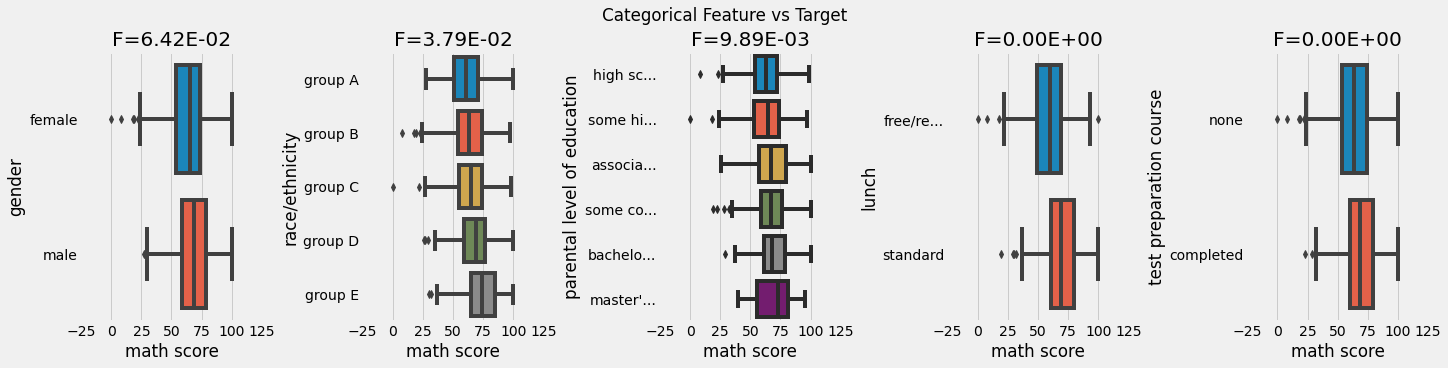

In [6]:
# Using the dabl library, we apply the accurate plots for our catagorical variable match score, the results are as follows, this helps give us a better 
# understanding of the data
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'math score')

In [7]:
# Next we will see if lunch has any effect of students performance by checking the average scores for the students
data[['lunch', 'gender', 'math score', 'writing score', 'reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

In [8]:
# Next we will see if preparation has any effects on average scores of the students 
data[['gender', 'test preparation course', 'reading score', 'writing score', 'math score']].groupby(['test preparation course', 'gender']).agg('median')

reading score  writing score  math score
test preparation course gender                                          
completed               female           78.0           79.0        67.0
                        male             71.0           70.0        73.0
none                    female           71.0           70.0        62.0
                        male             63.0           60.0        67.0

In [9]:
# Finally we will compare the parents level or education and see if that affects their scores
data[['parental level of education', 'race/ethnicity', 'math score', 'reading score', 'writing score']].groupby(['parental level of education','race/ethnicity']).agg('median')

math score  reading score  \
parental level of education race/ethnicity                              
associate's degree          group A               62.5           61.0   
                            group B               65.0           70.0   
                            group C               65.0           73.0   
                            group D               71.5           71.5   
                            group E               76.0           74.0   
bachelor's degree           group A               65.0           65.5   
                            group B               66.5           73.0   
                            group C               66.5           75.0   
                            group D               68.0           72.5   
                            group E               77.5           71.5   
high school                 group A               60.0           65.0   
                            group B               62.0           64.5   
                            group C               61.5           66.0   
                            group D               64.5           65.0   
                            group E               73.5           73.5   
master's degree             group A               50.0           67.0   
                            group B               67.5           83.0   
                            group C               69.0           68.0   
                            group D               77.0           80.0   
                            group E               81.0           85.5   
some college                group A               61.0           66.0   
                            group B               62.0           65.0   
                            group C               64.0           72.0   
                            group D               69.0           70.0   
                            group E               73.0           74.0   
some high school            group A               59.0           62.0   
                            group B               63.5           66.5   
                            group C               64.0           66.0   
                            group D               67.5           71.0   
                            group E               77.0           75.5   

                                            writing score  
parental level of education race/ethnicity                 
associate's degree          group A                  58.5  
                            group B                  68.0  
                            group C                  70.0  
                            group D                  73.0  
                            group E                  74.0  
bachelor's degree           group A                  64.5  
                            group B                  75.0  
                            group C                  77.0  
                            group D                  74.0  
                            group E                  71.5  
high school                 group A                  62.5  
                            group B                  62.5  
                            group C                  63.5  
                            group D                  66.0  
                            group E                  71.0  
master's degree             group A                  72.0  
                            group B                  81.0  
                            group C                  71.0  
                            group D                  78.0  
                            group E                  85.5  
some college                group A                  67.0  
                            group B                  66.0  
                            group C                  70.0  
                            group D                  73.0  
                            group E                  71.0  
some high school            group A                  55.5  
                           

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

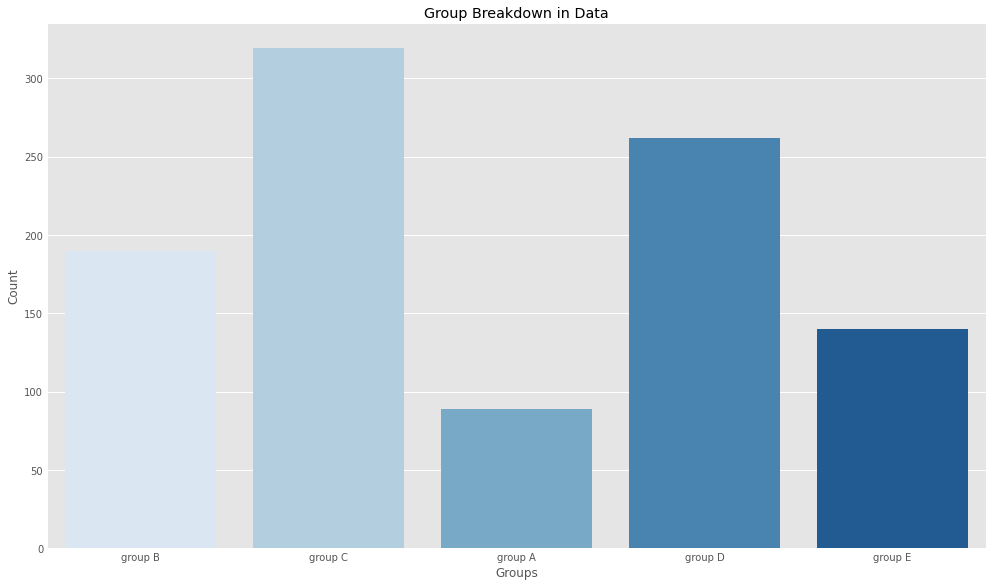

In [10]:
# Let us see the breakdown of groups inside the data
plt.rcParams['figure.figsize'] = (15, 9 )
plt.style.use('ggplot')

sns.countplot(data['race/ethnicity'], palette = 'Blues')
plt.title('Group Breakdown in Data')
plt.xlabel('Groups')
plt.ylabel('Count')

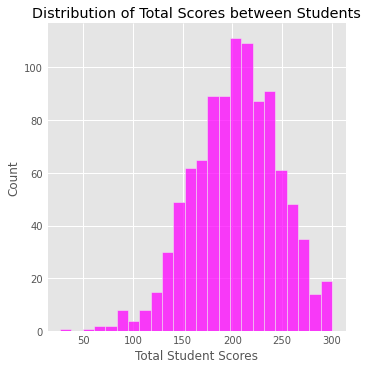

In [18]:
# Fnding the distribution of the total scores between the students
data['total_score'] = data['math score'] + data['writing score'] + data['reading score']
plt.rcParams['figure.figsize'] = (15, 15)
sns.displot(data['total_score'], color='magenta')
plt.title('Distribution of Total Scores between Students')
plt.ylabel('Count')
plt.xlabel('Total Student Scores')
plt.show()

#### <strong>Prepping the Data</strong>

In [19]:
# Calculating total percentage for each student
from math import *

data['percentage'] = data['total_score']/3

for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])

<ipython-input-19-be4443a42f04>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['percentage'][i] = ceil(data['percentage'][i])


In [21]:
# Assigning Grade Letters to student scores
def getgrade(percentage):
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['percentage']), axis = 1 )

data['grades'].value_counts()

B    260
C    252
D    248
A    156
O     58
E     26
Name: grades, dtype: int64

In [30]:
# Creating Categorical variables for the scores to either pass/fail
def passedSub(score):
  if score >= 40:
    return 'Pass'
  else:
    return 'Fail'

data['passed_math'] = data.apply(lambda x: passedSub(x['math score']), axis = 1)
data['passed_read'] = data.apply(lambda x: passedSub(x['reading score']), axis = 1)
data['passed_write'] = data.apply(lambda x: passedSub(x['writing score']), axis = 1)


In [31]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])

# label encoding for lunch
data['lunch'] = le.fit_transform(data['lunch'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

# label encoding for parental level of education
data['parental level of education'] = le.fit_transform(data['parental level of education'])

#label encoding for gender
data['gender'] = le.fit_transform(data['gender'])

#label encoding for the categorical scores
data['passed_math'] = le.fit_transform(data['passed_math'])
data['passed_read'] = le.fit_transform(data['passed_read'])
data['passed_write'] = le.fit_transform(data['passed_write'])

In [36]:
# Reviewing the data
data.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage,grades,passed_math,passed_read,passed_write
338,0,2,5,0,1,24,38,27,89,30.0,E,0,0,0
17,0,2,5,0,1,18,32,28,78,26.0,E,0,0,0
905,1,4,4,1,1,88,77,77,242,81.0,A,1,1,1
356,1,1,0,1,1,63,61,61,185,62.0,C,1,1,1
239,1,3,0,1,1,84,80,80,244,82.0,A,1,1,1
585,0,3,0,1,1,65,76,76,217,73.0,B,1,1,1
652,0,4,4,1,0,85,86,98,269,90.0,O,1,1,1
337,1,3,0,1,1,49,51,43,143,48.0,D,1,1,1
263,0,5,2,1,1,99,93,90,282,94.0,O,1,1,1
429,1,3,5,0,1,68,63,54,185,62.0,C,1,1,1


In [50]:
# Isolating the target variable which is grades
x = data[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'total_score', 'percentage', 'passed_math', 'passed_read','passed_write']]
y = data['grades']


In [46]:
x.shape

(1000, 13)

In [51]:
y.shape

(1000,)

#### <strong>Splitting the Data into Training and Testing</strong>

In [53]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
# Splitting the data in training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=45)
print('Train Set:', x_train.shape, y_train.shape)
print('Test Set:', x_test.shape, y_test.shape)

Train Set: (750, 13) (750,)
Test Set: (250, 13) (250,)


In [54]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [55]:
# Applying principal component analysis
from sklearn.decomposition import PCA

# creating a principal component analysis model
pca = PCA(n_components = None)

# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# visualising the principal components that will explain the highest share of variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# creating a principal component analysis model
pca = PCA(n_components = 2)

# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

[2.47056500e-01 2.16513355e-01 1.98912941e-01 1.21676795e-01
 9.19255235e-02 6.84836831e-02 3.73407168e-02 1.19969846e-02
 3.14391912e-03 1.93744150e-03 1.00579376e-03 6.34621290e-06
 2.98844668e-33]


#### <strong>Model Building</strong>

In [58]:
# Logistic Regression Model 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", lr.score(x_train, y_train))
print("Testing Accuracy :", lr.score(x_test, y_test))

Training Accuracy : 0.38666666666666666
Testing Accuracy : 0.432


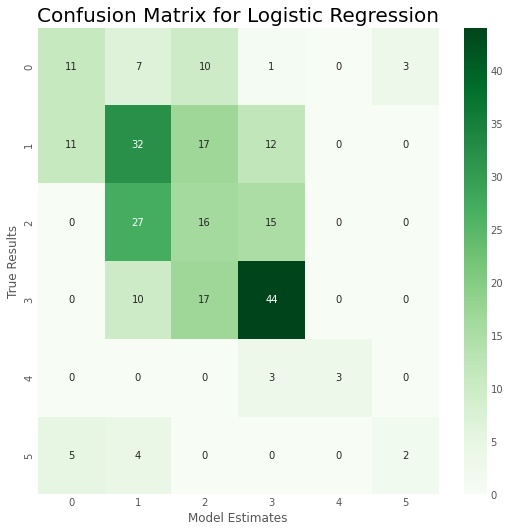

In [61]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix

# Showcasing the confusion matrix
cm = confusion_matrix(y_test, y_hat)
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Greens')
plt.title('Confusion Matrix for Logistic Regression', fontweight = 30, fontsize = 20)
plt.ylabel('True Results')
plt.xlabel('Model Estimates')
plt.show()

In [62]:
# Using RandomForst to see if we can get a more accurate model
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.772


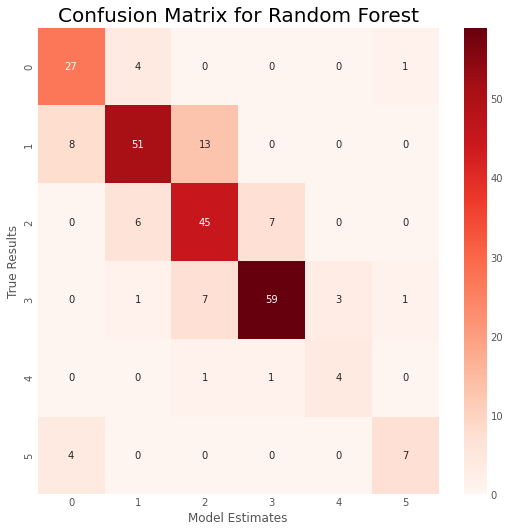

In [64]:
# Plot RandomForest confusion matrix
from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.ylabel('True Results')
plt.xlabel('Model Estimates')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()

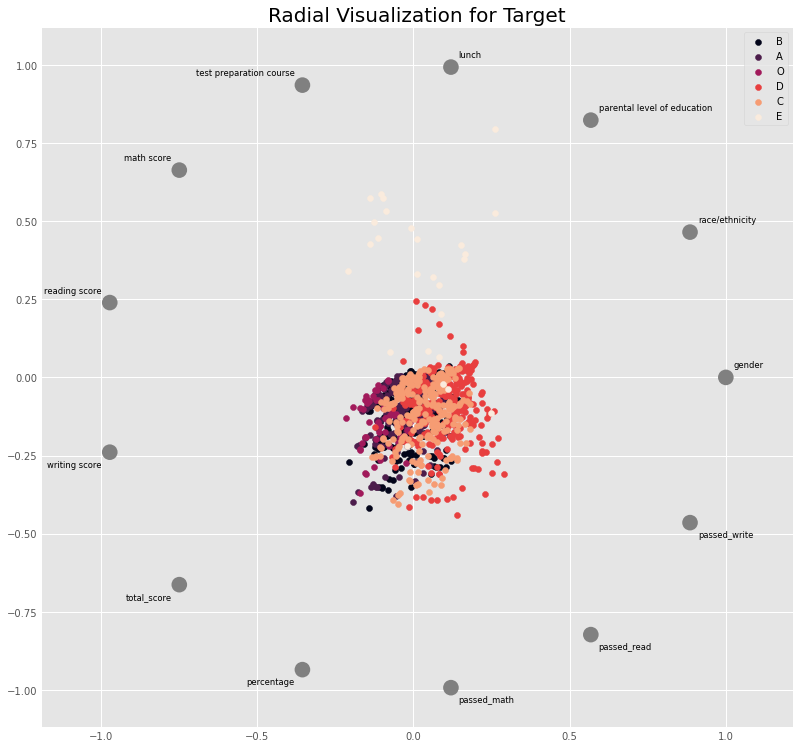

In [65]:
# Constructing a Radical Visualization graph to see what factors affect grades the most
from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(12, 12))
new_df = x.copy()
new_df["status"] = y
radviz(new_df, "status", ax=ax, colormap="rocket")
plt.title('Radial Visualization for Target', fontsize = 20)
plt.show()

#### <strong>Conclusion</strong>
##### We have succesfully constructed a model that predicts the grade of a student with moderate accuracy given the features provided. We will continue to finetune the model for increased accuracy.<br><br> We have also seen through our radial viz that features like lunch, parents level of education and if they had taken a test preparation course had an impact on their overall score, this discovery can help future students better prepare for upcoming examinations